## Las correrías de Rafaela y Adolfo

Rafaela lleva semanas sintiendo que Adolfo la viene tratando diferente; con algo de desidia y con comportamientos inusuales. Por esto, usando un programa que compró en Unilago, ha descargado los datos de los últimos tres meses de las dos SIM-Cards de Adolfo (personal y corporativa), así como los extractos de su tarjeta de crédito (un día que él dejó su computador desatendido), y un registro de llamadas de la factura del celular.

<img src="mexican.jpg" width="450"/>

En esta carpeta Usted encontrará los archivos:
* "evidencia/WApp_Corporativo.csv"
* "evidencia/WApp_Personal.csv"
* "evidencia/DatosFacturaMovistar.csv"
* "evidencia/Municipios.xls"
* "evidencia/TarjetaCred.csv"

### Episodio 1: 

#### ¿Será que habla con otra? ¿Cuánto lleva en esas?


##### (A) El WhatsApp Personal

In [1]:
import pandas as pd
import seaborn as sb

file = "evidencia/WApp_Personal.csv"
WA_Person = pd.read_csv(file)

# Usar ".head()" o ".columns" para inspeccionar columnas
WA_Person.head()

,Unnamed: 0,LastSeen
0,0,2018-06-10 08:18:00
1,1,2018-06-10 10:28:00
2,2,2018-06-10 12:49:00
3,3,2018-06-10 14:01:00
4,4,2018-06-10 16:29:00


In [2]:
# Hay una columna de ruido (Solo nos importa "LastSeen"). Retirar:
WA_Person.drop( ["Unnamed: 0"], axis=1, inplace=True )
WA_Person.head()

,LastSeen
0,2018-06-10 08:18:00
1,2018-06-10 10:28:00
2,2018-06-10 12:49:00
3,2018-06-10 14:01:00
4,2018-06-10 16:29:00


In [3]:
# Use ".dtypes" para asegurarse que los datos están en formato correco
WA_Person.dtypes

LastSeen    object
dtype: object

In [4]:
# Para Python el tipo "object" es texto. Cambiar a "datetime"
WA_Person["LastSeen"] = pd.to_datetime(WA_Person["LastSeen"])
WA_Person.dtypes

LastSeen    datetime64[ns]
dtype: object

##### Voila!

Finalmente tenemos los datos (de WA) limpios. Ahora ¿qué hacer con ellos? Con lo poco que hay, miremos a qué horas se conecta/desconecta Adolfo regularmente.

Para esto deberíamos tomar los objetos tipo DateTime de la columna "LastSeen" y **separar la fecha de la hora**. Quizá sea buena idea **enviar la fecha al índice del DataFrame** y conservar una columna con las horas de desconexión.

In [5]:
import datetime as dt

WA_Person["LastSeen"]

0     2018-06-10 08:18:00
1     2018-06-10 10:28:00
2     2018-06-10 12:49:00
3     2018-06-10 14:01:00
4     2018-06-10 16:29:00
              ...        
298   2018-08-20 13:11:00
299   2018-08-20 17:14:00
300   2018-08-21 07:40:00
301   2018-08-21 13:47:00
302   2018-08-21 17:03:00
Name: LastSeen, Length: 303, dtype: datetime64[ns]

In [6]:
# Crear una columna tipo float con la hora en decimales (combinando horas y minutos)

WA_Person["Hora"] = WA_Person["LastSeen"].dt.hour + (1.0/60)*WA_Person["LastSeen"].dt.minute

WA_Person.head()

,LastSeen,Hora
0,2018-06-10 08:18:00,8.300000
1,2018-06-10 10:28:00,10.466667
2,2018-06-10 12:49:00,12.816667
3,2018-06-10 14:01:00,14.016667
4,2018-06-10 16:29:00,16.483333


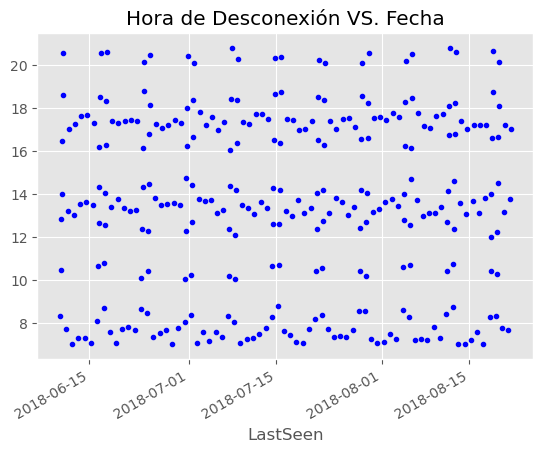

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Dibujar Hora de Desconexión contra Fecha
WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
plt.title("Hora de Desconexión VS. Fecha")
plt.show()

Nada raro. "Siempre he dicho que Adolfo es un tipo muy regular en sus hábitos", decía Rafaela.

##### (B) El WhatsApp Corporativo

Apliquemos el mismo procedimiento para los datos de la otra SIM-Card.

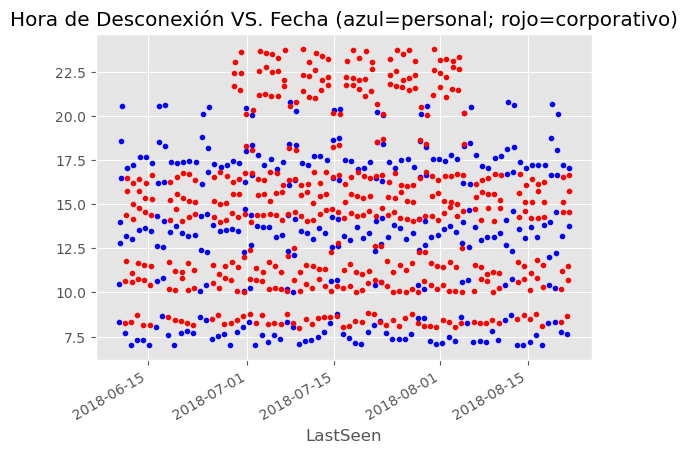

In [8]:
file = "evidencia/WApp_Corporativo.csv"
WA_Corp = pd.read_csv(file)
WA_Corp.drop( ["Unnamed: 0"], axis=1, inplace=True)
WA_Corp["LastSeen"] = pd.to_datetime(WA_Corp["LastSeen"])
WA_Corp["Hora"] = WA_Corp["LastSeen"].dt.hour + (1.0/60)*WA_Corp["LastSeen"].dt.minute

ax1 = WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
WA_Corp.plot(x="LastSeen", y="Hora", style='.', color='r', ax=ax1, legend=False)

plt.title("Hora de Desconexión VS. Fecha (azul=personal; rojo=corporativo)")
plt.show()


### Episodio 2:

#### ¿Será solo coqueteo o...?

Miremos las llamadas:

In [9]:
file = "evidencia/DatosFacturaMovistar.csv"

Cel = pd.read_csv(file)
Cel.drop( ["Unnamed: 0"], axis=1, inplace=True)
Cel.head()

,CodeAntena,Duracion,Hora,NumeroDestino
0,1100135764,0 days 00:05:00.000000000,2018-06-01 08:17:00,301.009.5672
1,1100135889,0 days 00:05:00.000000000,2018-06-01 19:51:00,315.777.6549
2,1100135649,0 days 00:03:00.000000000,2018-06-01 07:58:00,315.777.6549
3,1100135655,0 days 00:05:00.000000000,2018-06-02 17:25:00,315.777.6549
4,1100123525,0 days 00:01:00.000000000,2018-06-02 14:44:00,315.777.6549


"Nada raro con los números; son todos de la familia. ¿Qué más jugo le puedo sacar a esto?"

[Llamada a un amigo ingeniero...]

Resulta que los códigos de las antenas funcionan así:

Si se tiene "WWXXXYYZZZ", entonces:

* 'WW': Departamento
* 'XXX': Municipio
* 'YY': Operador
* 'ZZZ': Localización antena

In [10]:
# Remover columnas inútiles
Cel.drop( ["Duracion"], axis=1, inplace=True)

# Corroborar tipos
print(Cel.dtypes)

CodeAntena        int64
Hora             object
NumeroDestino    object
dtype: object


In [11]:
# Arreglar tipos
Cel["CodeAntena"] = Cel["CodeAntena"].astype(str)
print(Cel.dtypes)

CodeAntena       object
Hora             object
NumeroDestino    object
dtype: object


In [12]:
def tomar5bits(x):
    return x[:5]

# Tomar solo el pedazo de CodeAntena referente a Departamento y Municipio
# Cel["DeptoMuni"] = Cel["CodeAntena"].apply( lambda x: x[:5])

Cel["DeptoMuni"] = Cel["CodeAntena"].apply( tomar5bits )
Cel.head(20)

,CodeAntena,Hora,NumeroDestino,DeptoMuni
0,1100135764,2018-06-01 08:17:00,301.009.5672,11001
1,1100135889,2018-06-01 19:51:00,315.777.6549,11001
2,1100135649,2018-06-01 07:58:00,315.777.6549,11001
3,1100135655,2018-06-02 17:25:00,315.777.6549,11001
4,1100123525,2018-06-02 14:44:00,315.777.6549,11001
5,1100187846,2018-06-02 20:06:00,300.227.8739,11001
6,1100135299,2018-06-02 17:49:00,315.777.6549,11001
7,1100162871,2018-06-02 13:33:00,301.009.5672,11001
8,1100162804,2018-06-03 14:42:00,315.777.6549,11001
9,1100162365,2018-06-03 20:02:00,315.777.6549,11001


In [13]:
# Cargar base de municipios para averiguar códigos
muni = pd.read_excel("evidencia/Municipios.xls", sheet_name="Municipios")
muni.head(10)

,RESULTADOS CENSO GENERAL 2005,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Necesidades Básicas Insatisfechas - NBI, por t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio,Personas en NBI,NaN,NaN,NaN,NaN,NaN,Nota Aclaratoria
3,NaN,NaN,NaN,NaN,Cabecera,NaN,Resto,NaN,Total,NaN,NaN
4,NaN,NaN,NaN,NaN,Prop (%),cve (%),Prop (%),cve (%),Prop (%),cve (%),NaN
5,05,ANTIOQUIA,001,MEDELLIN,12.326798,2.705096,18.278171,13.473549,12.42409,2.65985,NaN
6,05,ANTIOQUIA,002,ABEJORRAL,30.262306,-,35.474656,-,33.85112,-,NaN
7,05,ANTIOQUIA,004,ABRIAQUI,11.520737,-,35.904255,-,28.538283,-,NaN
8,05,ANTIOQUIA,021,ALEJANDRIA,24.032258,-,42.249731,-,33.136095,-,NaN
9,05,ANTIOQUIA,030,AMAGA,21.591507,6.138625,33.011784,7.28243,27.069045,4.963595,NaN


In [14]:
# El archivo original es un desastre
# Tomar nombres de columnas con base en la fila 2
muni.columns = muni.iloc[2,:]

# Alternativa a "head" (más general; indexa filas y columnas)
muni.iloc[-2:,:]

2,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio,Personas en NBI,NaN,NaN,NaN,NaN,NaN,Nota Aclaratoria
1124,99,VICHADA,773,CUMARIBO,46.433348,-,90.709598,-,82.430179,-,NaN
1125,- Significa que en el municipio fue censo por...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# desechar filas basura y renombrar columnas
muni.drop( muni.index[[0,1,2,3,4,1125]], inplace=True )

muni = muni[["Código Deapartamento","Nombre Departamento","Código Municipio","Nombre Municipio"]]

reemplazo = {"Código Deapartamento":"Cod_Depto",
             "Nombre Departamento":"Depto",
             "Código Municipio":"Cod_Muni",
             "Nombre Municipio":"Muni"}

muni.rename(columns=reemplazo, inplace=True)
muni.tail(10)

2,Cod_Depto,Depto,Cod_Muni,Muni
1115,97,VAUPES,001,MITU
1116,97,VAUPES,161,CARURU
1117,97,VAUPES,511,PACOA
1118,97,VAUPES,666,TARAIRA
1119,97,VAUPES,777,PAPUNAUA
1120,97,VAUPES,889,YAVARATE
1121,99,VICHADA,001,PUERTO CARREÑO
1122,99,VICHADA,524,LA PRIMAVERA
1123,99,VICHADA,624,SANTA ROSALIA
1124,99,VICHADA,773,CUMARIBO


In [16]:
# Convertir a string 
# (para comparar con Departamentos y Municipios del celular)

muni["Cod_Depto"] = muni["Cod_Depto"].astype(str)
muni["Cod_Muni"] = muni["Cod_Muni"].astype(str)

In [17]:
# Crear columna comparable 

# (Tanto Cel como Muni quedan con un "DeptoMuni" con codigos en string)
muni["DeptoMuni"] = muni[ ["Cod_Depto","Cod_Muni"] ].apply(lambda x: ''.join(x), axis=1) #Bonus

# Forma directa
muni["DeptoMuni"] = muni["Cod_Depto"] + muni["Cod_Muni"]
muni.head()

2,Cod_Depto,Depto,Cod_Muni,Muni,DeptoMuni
5,05,ANTIOQUIA,001,MEDELLIN,05001
6,05,ANTIOQUIA,002,ABEJORRAL,05002
7,05,ANTIOQUIA,004,ABRIAQUI,05004
8,05,ANTIOQUIA,021,ALEJANDRIA,05021
9,05,ANTIOQUIA,030,AMAGA,05030


In [18]:
Cel["DeptoMuni"].unique()

array(['11001', '23672'], dtype=object)

In [19]:
# Para cada Código "DeptoMuni" que aparezca en el Cel, 
# acumular filas que coincidan en "DeptoMuni" de muni

lista = []
for eachDept in Cel["DeptoMuni"].unique():
    lista.append(  muni[ muni["DeptoMuni"] == eachDept ]  )
lista

[2   Cod_Depto   Depto Cod_Muni          Muni DeptoMuni
 153        11  BOGOTA      001  BOGOTA, D.C.     11001,
 2   Cod_Depto    Depto Cod_Muni        Muni DeptoMuni
 455        23  CORDOBA      672  SAN ANTERO     23672]

In [20]:
# Uso más común de concat
pd.concat(lista)

2,Cod_Depto,Depto,Cod_Muni,Muni,DeptoMuni
153,11,BOGOTA,001,"BOGOTA, D.C.",11001
455,23,CORDOBA,672,SAN ANTERO,23672


In [21]:
# Ahora sí: muéstreme las llamadas que tenían origen en San Antero
Cel[ Cel["DeptoMuni"]=='23672' ]

,CodeAntena,Hora,NumeroDestino,DeptoMuni
381,2367235150,2018-08-03 11:56:00,315.777.6549,23672
382,2367262745,2018-08-03 15:59:00,315.777.6549,23672
383,2367262459,2018-08-03 11:06:00,300.227.8739,23672
384,2367235505,2018-08-04 13:10:00,301.009.5672,23672
385,2367223649,2018-08-04 21:04:00,315.777.6549,23672
386,2367287356,2018-08-04 08:10:00,301.009.5672,23672
387,2367262636,2018-08-04 21:45:00,311.487.6976,23672
388,2367235731,2018-08-05 07:40:00,311.487.6976,23672
389,2367223294,2018-08-05 19:53:00,301.009.5672,23672
390,2367223853,2018-08-05 14:53:00,311.487.6976,23672


"¡Pero este señor qué hace en San Antero! 

Todo el fin de semana del 3 al 5 de agosto que me dijo que se iba de seminario de la empresa.

¡Es que me va a oir! 


### Episodio 3: "¡¿Y con la platica de nosotros?!"

Miremos los extractos de la tarjeta:

In [22]:
file = "evidencia/TarjetaCred.csv"

# cargar datos extracto tarjeta
TCred = pd.read_csv(file)
TCred.drop( ["Unnamed: 0"], axis=1, inplace=True)
TCred.head()

,Concepto,Fecha/Hora,Valor
0,El Corral,2018-06-01 12:34:00,15000
1,El Pub,2018-06-01 22:59:00,22000
2,Uber,2018-06-01 23:56:00,12600
3,Falabella,2018-06-02 17:27:00,60000
4,CineColombia,2018-06-03 21:15:00,28000


In [23]:
TCred.dtypes

Concepto      object
Fecha/Hora    object
Valor          int64
dtype: object

"A ver qué es lo que hace los viernes que se pierde y le da por hacer cosas raras".

Miremos patrones en los días:

In [24]:
# La columna fecha hora viene como string 
# Y queremos analizarla como DATETIME
TCred["Fecha/Hora"] = pd.to_datetime(TCred["Fecha/Hora"])

# Obtener día de la semana y mes a partir de objeto tipo DATETIME
# OJO: tanto weekday como month devuelven un entero 
# (los mapeamos con "dias" y "meses")

TCred["DiaSemana"] = TCred["Fecha/Hora"].apply(lambda x: x.weekday())
TCred["Mes"] = TCred["Fecha/Hora"].apply(lambda x: x.month)
TCred.head()

,Concepto,Fecha/Hora,Valor,DiaSemana,Mes
0,El Corral,2018-06-01 12:34:00,15000,4,6
1,El Pub,2018-06-01 22:59:00,22000,4,6
2,Uber,2018-06-01 23:56:00,12600,4,6
3,Falabella,2018-06-02 17:27:00,60000,5,6
4,CineColombia,2018-06-03 21:15:00,28000,6,6


In [25]:
# Usar dias y meses en español como referencia
dias = {0:"1. Lun",1:"2. Mar",2:"3. Mie",3:"4. Jue",4:"5. Vie",5:"6. Sab",6:"7. Dom"}
meses = {6:"Jun",7:"Jul",8:"Ago",9:"Sep"}

TCred["DiaSemana"] = TCred["DiaSemana"].apply(lambda x: dias[x])
TCred["Mes"] = TCred["Mes"].apply(lambda x: meses[x])

TCred.head()

,Concepto,Fecha/Hora,Valor,DiaSemana,Mes
0,El Corral,2018-06-01 12:34:00,15000,5. Vie,Jun
1,El Pub,2018-06-01 22:59:00,22000,5. Vie,Jun
2,Uber,2018-06-01 23:56:00,12600,5. Vie,Jun
3,Falabella,2018-06-02 17:27:00,60000,6. Sab,Jun
4,CineColombia,2018-06-03 21:15:00,28000,7. Dom,Jun


In [26]:
'''
TCred["DiaSemana"] = TCred["Fecha/Hora"].apply( lambda x: dias[ x.weekday() ] )
TCred["Mes"] = TCred["Fecha/Hora"].apply( lambda x: meses[ x.month ] )
'''

'\nTCred["DiaSemana"] = TCred["Fecha/Hora"].apply( lambda x: dias[ x.weekday() ] )\nTCred["Mes"] = TCred["Fecha/Hora"].apply( lambda x: meses[ x.month ] )\n'

In [27]:
# Pasar datetime a indice
TCred.set_index("Fecha/Hora", inplace=True)
TCred.head()

,Concepto,Valor,DiaSemana,Mes
Fecha/Hora,,,,
2018-06-01 12:34:00,El Corral,15000,5. Vie,Jun
2018-06-01 22:59:00,El Pub,22000,5. Vie,Jun
2018-06-01 23:56:00,Uber,12600,5. Vie,Jun
2018-06-02 17:27:00,Falabella,60000,6. Sab,Jun
2018-06-03 21:15:00,CineColombia,28000,7. Dom,Jun


In [28]:

TCred.head()

,Concepto,Valor,DiaSemana,Mes
Fecha/Hora,,,,
2018-06-01 12:34:00,El Corral,15000,5. Vie,Jun
2018-06-01 22:59:00,El Pub,22000,5. Vie,Jun
2018-06-01 23:56:00,Uber,12600,5. Vie,Jun
2018-06-02 17:27:00,Falabella,60000,6. Sab,Jun
2018-06-03 21:15:00,CineColombia,28000,7. Dom,Jun


In [29]:
# GROUPBY: Muy importante para análisis.
Aux = TCred.groupby(["DiaSemana"]).mean()
Aux

C:\Users\ch.gomez171\AppData\Local\Temp\ipykernel_7032\749982797.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Aux = TCred.groupby(["DiaSemana"]).mean()


,Valor
DiaSemana,
1. Lun,13800.000000
2. Mar,103185.714286
3. Mie,13600.000000
4. Jue,143000.000000
5. Vie,16533.333333
6. Sab,60000.000000
7. Dom,28000.000000


In [30]:
# GROUPBY: Muy importante para análisis.
Aux = TCred.groupby(["Mes","DiaSemana"]).mean()
Aux

C:\Users\ch.gomez171\AppData\Local\Temp\ipykernel_7032\2429773932.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Aux = TCred.groupby(["Mes","DiaSemana"]).mean()


Valor
Mes DiaSemana               
Ago 1. Lun      13800.000000
    2. Mar      14200.000000
    3. Mie      13600.000000
    4. Jue      14000.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000
Jul 1. Lun      13800.000000
    2. Mar     221833.333333
    3. Mie      13600.000000
    4. Jue     375200.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000
Jun 1. Lun      13800.000000
    2. Mar      14200.000000
    3. Mie      13600.000000
    4. Jue      14000.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000

In [31]:
# Stack y Unstack: importante al trabajar con multi-indices 
# (i.e., dimensiones altas)
    # Stack es enviar columnas a indices
    # Unstack es enviar indices a columnas

Aux = Aux.unstack()
Aux

Valor                                                           \
DiaSemana   1. Lun         2. Mar   3. Mie    4. Jue        5. Vie   6. Sab   
Mes                                                                           
Ago        13800.0   14200.000000  13600.0   14000.0  16533.333333  60000.0   
Jul        13800.0  221833.333333  13600.0  375200.0  16533.333333  60000.0   
Jun        13800.0   14200.000000  13600.0   14000.0  16533.333333  60000.0   

                    
DiaSemana   7. Dom  
Mes                 
Ago        28000.0  
Jul        28000.0  
Jun        28000.0

In [32]:
Aux.columns = Aux.columns.droplevel()
Aux

DiaSemana,1. Lun,2. Mar,3. Mie,4. Jue,5. Vie,6. Sab,7. Dom
Mes,,,,,,,
Ago,13800.0,14200.000000,13600.0,14000.0,16533.333333,60000.0,28000.0
Jul,13800.0,221833.333333,13600.0,375200.0,16533.333333,60000.0,28000.0
Jun,13800.0,14200.000000,13600.0,14000.0,16533.333333,60000.0,28000.0


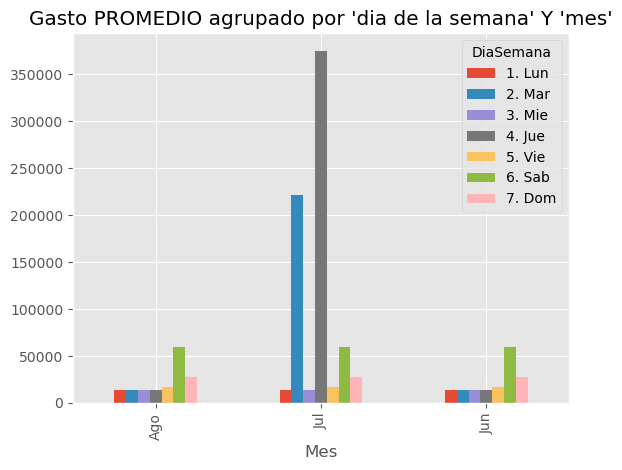

In [33]:
Aux.plot(kind='bar')
plt.title("Gasto PROMEDIO agrupado por 'dia de la semana' Y 'mes'")
plt.show()

"¡Cómo así que este tipo se estuvo gastando 200 y 300 mil pesos los martes y jueves de julio!

Muestre a ver en qué..."

In [34]:
# MUY ÚTIL: slicing basado en valores (y lógica)
TCred[ TCred["Valor"] > 200000 ]

,Concepto,Valor,DiaSemana,Mes
Fecha/Hora,,,,
2018-07-17 15:35:00,Avianca,1260000,2. Mar,Jul
2018-07-19 11:08:00,Decameron,1820000,4. Jue,Jul


In [35]:
# MUY ÚTIL: operaciones sobre columnas
TCred["Valor"][ TCred["Valor"] > 200000].sum()

3080000

"¡Pero este desgraciado se gasta 3 millones en un paseo con quién sabe quién, con los ahorritos de nosotros!

¡Ténganme!"

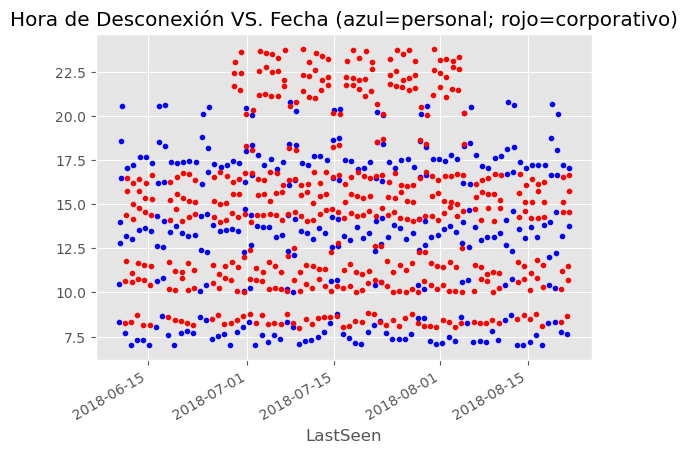

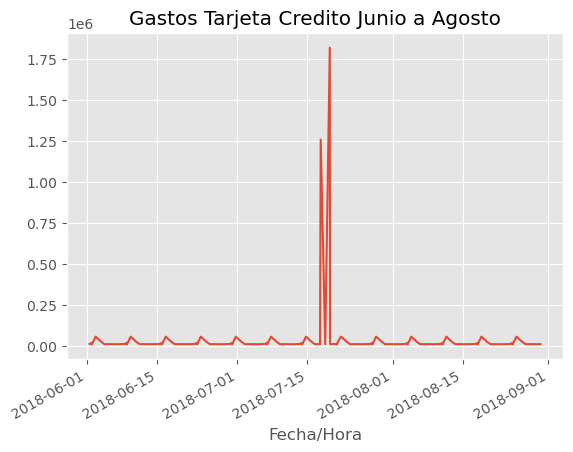

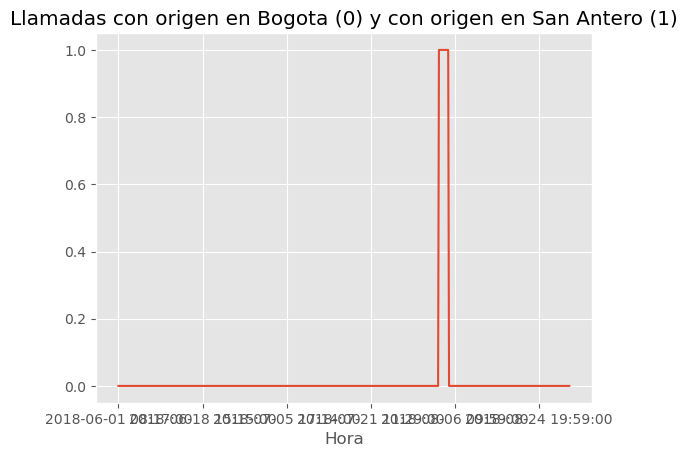

In [36]:
# Dibujos de resumen
ax1 = WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
WA_Corp.plot(x="LastSeen", y="Hora", style='.', color='r', ax=ax1, legend=False)
plt.title("Hora de Desconexión VS. Fecha (azul=personal; rojo=corporativo)")
plt.show()

TCred["Valor"].plot()
plt.title("Gastos Tarjeta Credito Junio a Agosto")
plt.show()

Cel["DeptoMuni"].replace(to_replace={'23672':1, '11001':0}, inplace=True)
Cel.set_index("Hora", inplace=True)
Cel["DeptoMuni"].plot()
plt.title("Llamadas con origen en Bogota (0) y con origen en San Antero (1)")
plt.show()

"Ay, Adolfo...

La empezaste a enredar empezando julio. A fin de mes le compraste paseo, te la llevaste empezando agosto (3 millones por un fin de semana que ni puente era) ¡Y SOS TAN CONCHUDO QUE NI LE VOLVISTE A COQUETEAR!

Todos son iguales."